# **Predicting Customer Churn in a Telecom Company**

### **Introduction**

In today's competitive market, subscription-based businesses face significant challenges in retaining customers. Customer churn, or the rate at which customers discontinue their subscription services, is a critical metric for these businesses. A high churn rate can significantly impact revenue and growth, making it essential for companies to identify and mitigate factors leading to customer churn.

This project aims to develop a predictive model to identify customers who are likely to churn. By leveraging historical data on customer behavior, demographics, and interactions, we can build a machine learning model that accurately predicts churn. This enables the business to implement targeted retention strategies, enhancing customer satisfaction and loyalty while reducing the overall churn rate.

### **Business Understanding**

Subscription-based businesses rely heavily on recurring revenue from their customer base. Losing customers not only affects immediate revenue but also increases the cost of acquiring new customers. Therefore, understanding the factors that contribute to customer churn and being able to predict churn is crucial for sustaining long-term growth and profitability.

**Objective**

The primary objective of this project is to predict customer churn for a subscription-based business. By identifying customers at risk of leaving, the business can take proactive measures to retain them, thereby reducing churn rates and improving customer retention.

**Key Questions**

- Which customers are likely to churn?

By predicting the likelihood of churn, the business can focus retention efforts on high-risk customers.

- What are the key factors contributing to churn?

Understanding these factors helps in refining business strategies and improving customer experience.

- How can the business reduce the churn rate?

Based on predictions, the business can design targeted interventions to retain customers.

### **Metric of Success**

The primary metric of success for this project is Precision, with a target range of 80% to 90%.

Precision: This metric measures the accuracy of identifying customers likely to churn, ensuring that retention efforts are focused effectively. A higher precision means fewer resources wasted on false positives, maximizing the impact of our strategies.

## **Data Understanding**

- customerID: A unique identifier for each customer.

- gender: The gender of the customer (e.g., Male or Female).

- SeniorCitizen: Indicates whether the customer is a senior citizen (1 for Yes, 0 for No).

- Partner: Indicates whether the customer has a partner (True for Yes, False for No).

- Dependents: Indicates whether the customer has dependents (True for Yes, False for No).

- tenure: The number of months the customer has stayed with the company.

- PhoneService: Indicates whether the customer has a phone service (True for Yes, False for No).

- MultipleLines: Indicates whether the customer has multiple lines (Yes, No, or NaN if not applicable).

- InternetService: The type of internet service the customer has (e.g., DSL, Fiber optic, No).

- OnlineSecurity: Indicates whether the customer has online security service (Yes, No, or NaN if not applicable).

- OnlineBackup: Indicates whether the customer has online backup service (Yes, No, or NaN if not applicable).

- DeviceProtection: Indicates whether the customer has device protection service (Yes, No, or NaN if not applicable).

- TechSupport: Indicates whether the customer has tech support service (Yes, No, or NaN if not applicable).

- StreamingTV: Indicates whether the customer has streaming TV service (Yes, No, or NaN if not applicable).

- StreamingMovies: Indicates whether the customer has streaming movies service (Yes, No, or NaN if not applicable).

- Contract: The type of contract the customer has (e.g., Month-to-month, One year, Two year).

- PaperlessBilling: Indicates whether the customer is enrolled in paperless billing (True for Yes, False for No).

- PaymentMethod: The payment method used by the customer (e.g., Electronic check, Mailed check, Bank transfer, Credit card).

- MonthlyCharges: The amount charged to the customer monthly.

- TotalCharges: The total amount charged to the customer.

- Churn: Indicates whether the customer has churned (left the company) (Yes or No).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
mergedTrain_data = pd.read_csv('data/merged_data.csv')
mergedTrain_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,NaN,NaN,DSL,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Electronic check,29.850000,29.850000381469727,NaN
1,5575-GNVDE,Male,0,No,No,34,NaN,NaN,DSL,NaN,...,NaN,NaN,NaN,NaN,One year,NaN,Mailed check,56.950001,1889.5,NaN
2,3668-QPYBK,Male,0,No,No,2,NaN,NaN,DSL,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Mailed check,53.849998,108.1500015258789,NaN
3,7795-CFOCW,Male,0,No,No,45,NaN,NaN,DSL,NaN,...,NaN,NaN,NaN,NaN,One year,NaN,Bank transfer (automatic),42.299999,1840.75,NaN
4,9237-HQITU,Female,0,No,No,2,NaN,NaN,Fiber optic,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Electronic check,70.699997,151.64999389648438,NaN


In [3]:
# Check for duplicates
duplicates = mergedTrain_data.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')


Number of duplicate rows: 0


In [4]:
# Check for missing values
missing_values = mergedTrain_data.isnull().sum()
print('Missing values in each column:\n', missing_values)


Missing values in each column:
 customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService        3000
MultipleLines       3000
InternetService        0
OnlineSecurity      3000
OnlineBackup        3000
DeviceProtection    3000
TechSupport         3000
StreamingTV         3000
StreamingMovies     3000
Contract               0
PaperlessBilling    3000
PaymentMethod          0
MonthlyCharges         0
TotalCharges           5
Churn               3000
dtype: int64


In [5]:
mergedTrain_data['TotalCharges'] = pd.to_numeric(mergedTrain_data['TotalCharges'], errors= 'coerce')
# Fill missing values in 'TotalCharges' with the mean of the column
mergedTrain_data['TotalCharges'] = mergedTrain_data['TotalCharges'].fillna(mergedTrain_data['TotalCharges'].mean())

# Fill missing values in categorical columns with the mode of each column
for column in ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PhoneService']:
    mergedTrain_data[column] = mergedTrain_data[column].fillna(mergedTrain_data[column].mode()[0])

# Fill missing value in 'Churn' column with the mode
mergedTrain_data['Churn'] = mergedTrain_data['Churn'].fillna(mergedTrain_data['Churn'].mode()[0])


# Verify if there are any missing values left
missing_values_after_filling = mergedTrain_data.isnull().sum()
print('Missing values after filling:\n', missing_values_after_filling)

Missing values after filling:
 customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling    3000
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64


In [6]:
mergedTrain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [7]:
mergedTrain_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5043.000000,5043.000000,5043.000000,5043.000000
mean,0.162403,32.576641,65.090214,2302.062861
std,0.368857,24.529807,30.068133,2267.682399
min,0.000000,0.000000,18.400000,18.799999
25%,0.000000,9.000000,35.775000,418.000000
50%,0.000000,29.000000,70.550003,1406.000000
75%,0.000000,56.000000,90.050003,3857.575073
max,1.000000,72.000000,118.650002,8670.100000


## **Exploratory Data Analysis**

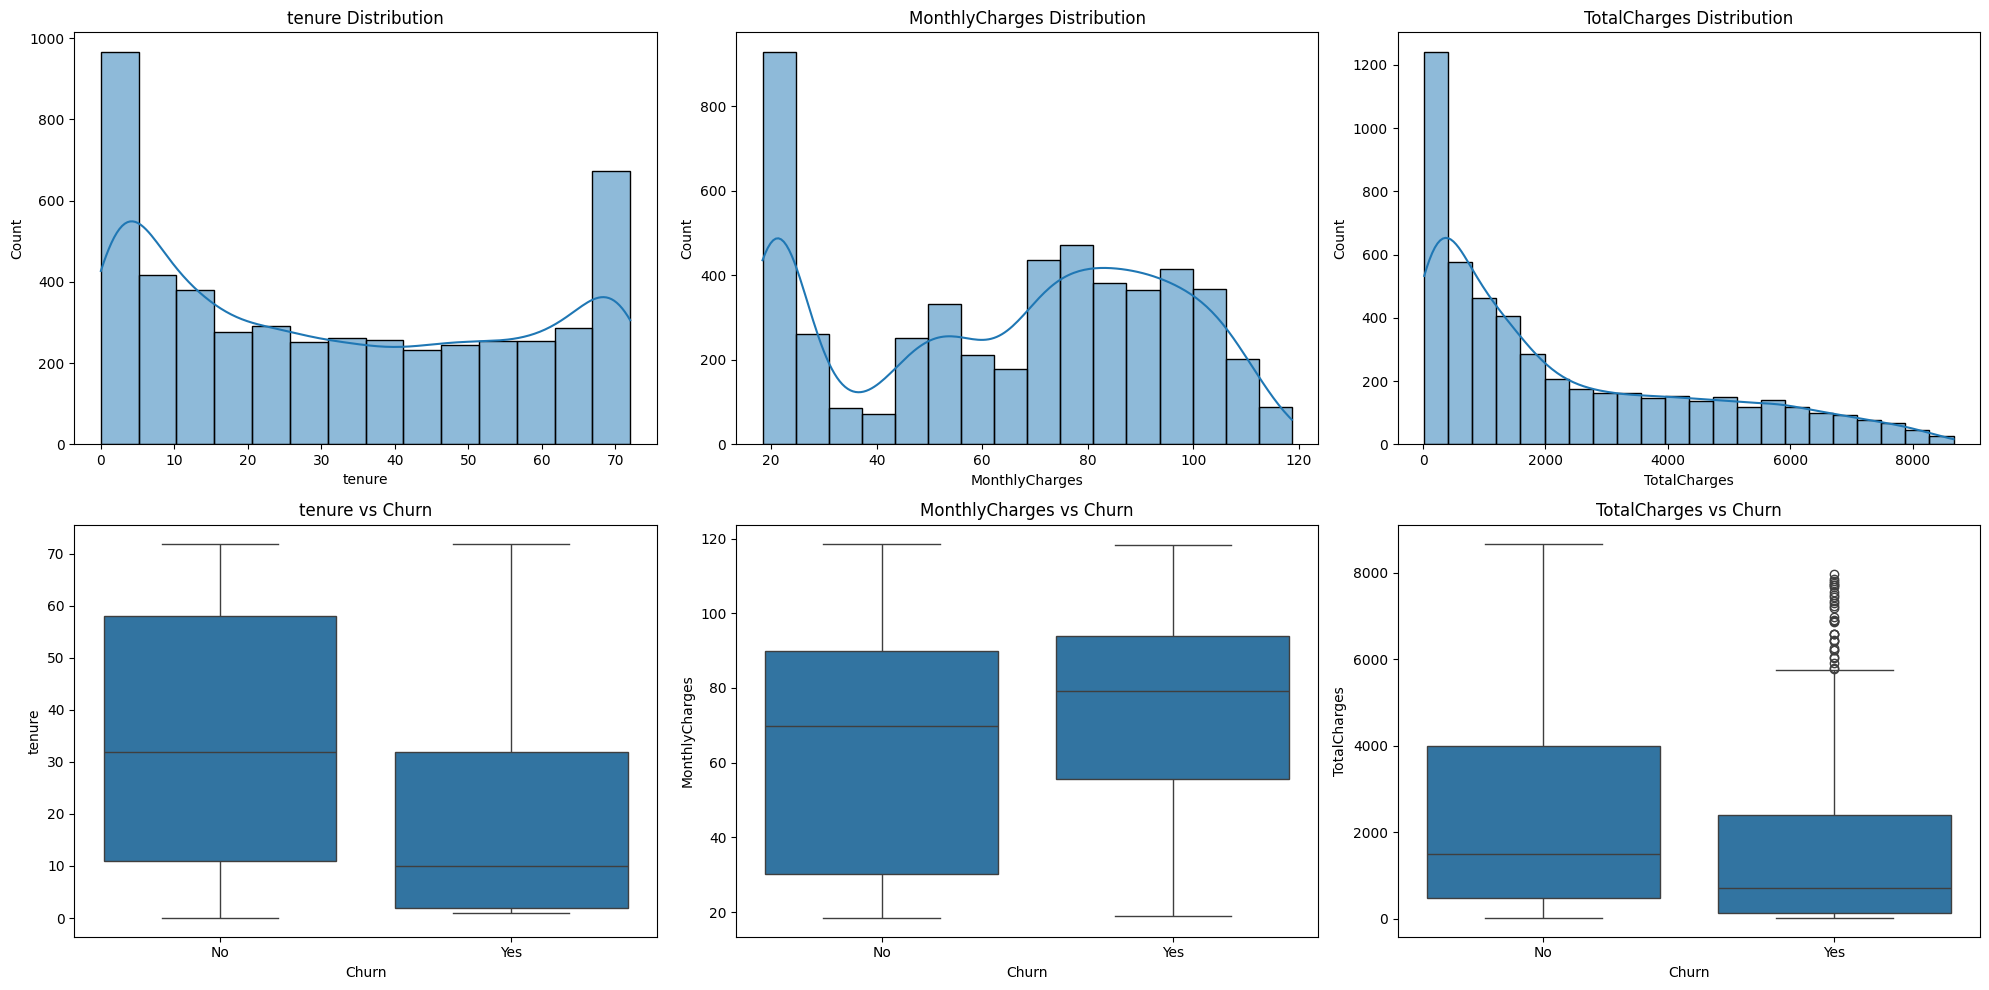

In [8]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(20, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, len(numerical_columns), i)
    sns.histplot(data=mergedTrain_data, x=column, kde=True)
    plt.title(f'{column} Distribution')
    
    plt.subplot(2, len(numerical_columns), i + len(numerical_columns))
    sns.boxplot(data=mergedTrain_data, x='Churn', y=column)
    plt.title(f'{column} vs Churn')

plt.tight_layout()
plt.show()

C:\Users\denok\AppData\Local\Temp\ipykernel_9628\2243264225.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=mergedTrain_data, x=column, palette=[custom_palette[i-1]])
C:\Users\denok\AppData\Local\Temp\ipykernel_9628\2243264225.py:16: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(data=mergedTrain_data, x=column, palette=[custom_palette[i-1]])
C:\Users\denok\AppData\Local\Temp\ipykernel_9628\2243264225.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=mergedTrain_data, x=column, palette=[custom_palette[i-1]])
C:\Users\denok\AppData\Local\Temp\ipykernel_9628\22

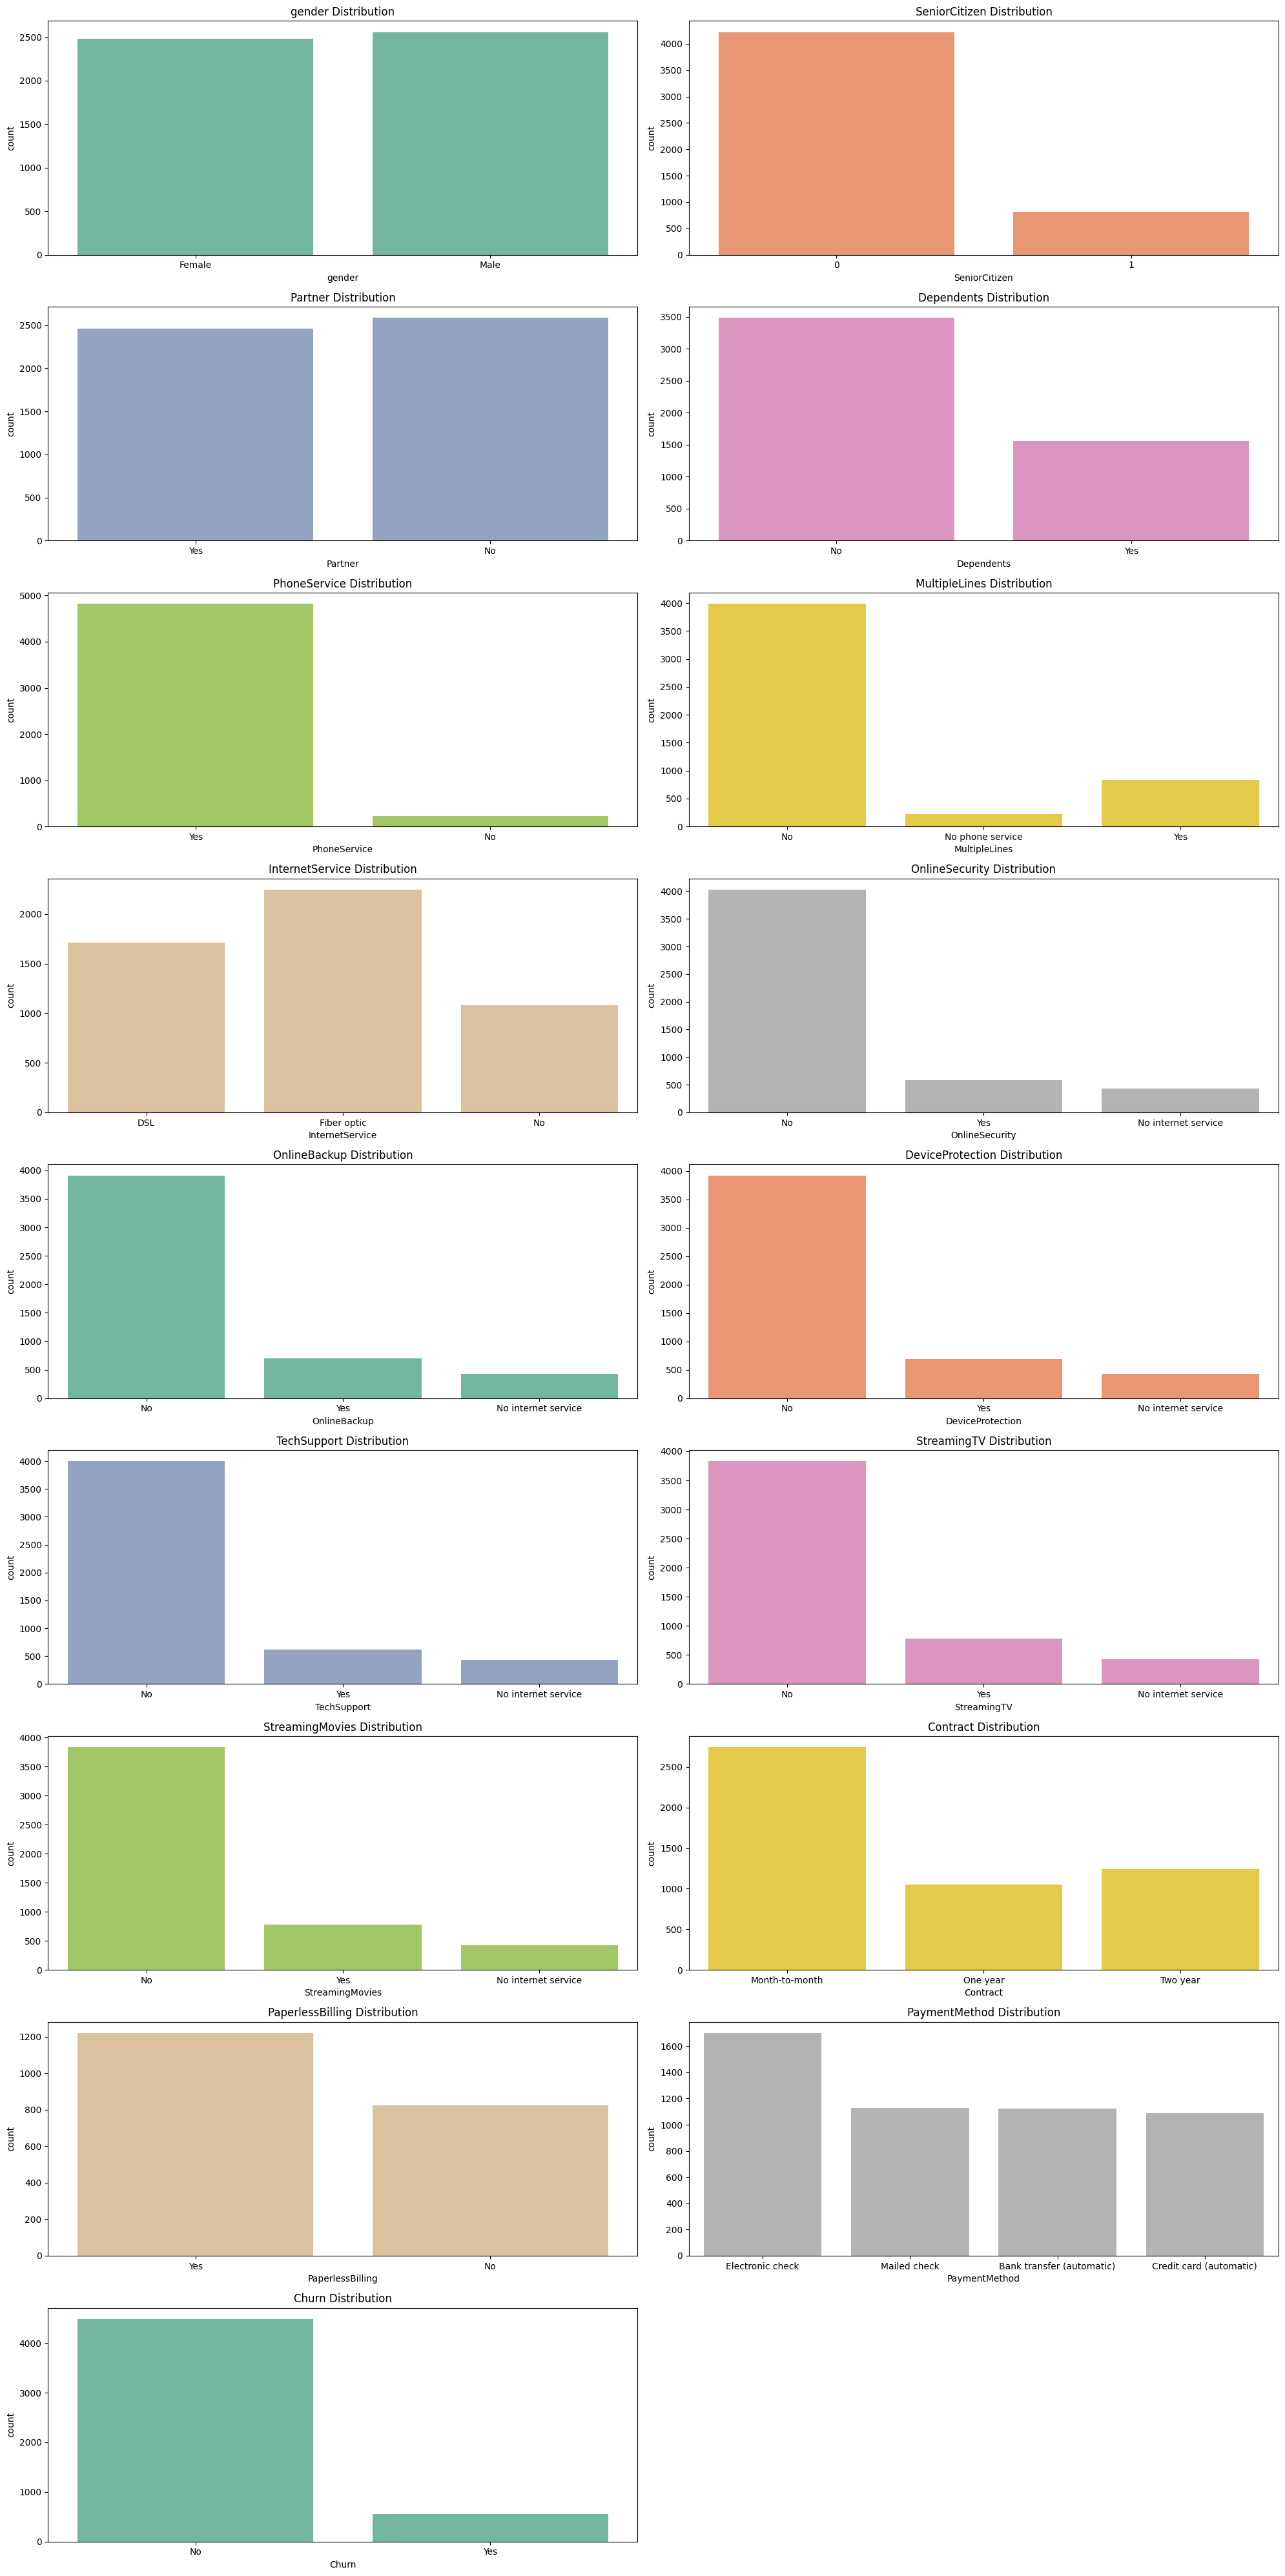

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

plt.figure(figsize=(20, 40))

# Using a custom palette with seaborn color palette 'Set2'
custom_palette = sns.color_palette('Set2', n_colors=len(categorical_columns))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns) // 2 + 1, 2, i)
    ax = sns.countplot(data=mergedTrain_data, x=column, palette=[custom_palette[i-1]])
    plt.title(f'{column} Distribution')

plt.tight_layout()
plt.show()


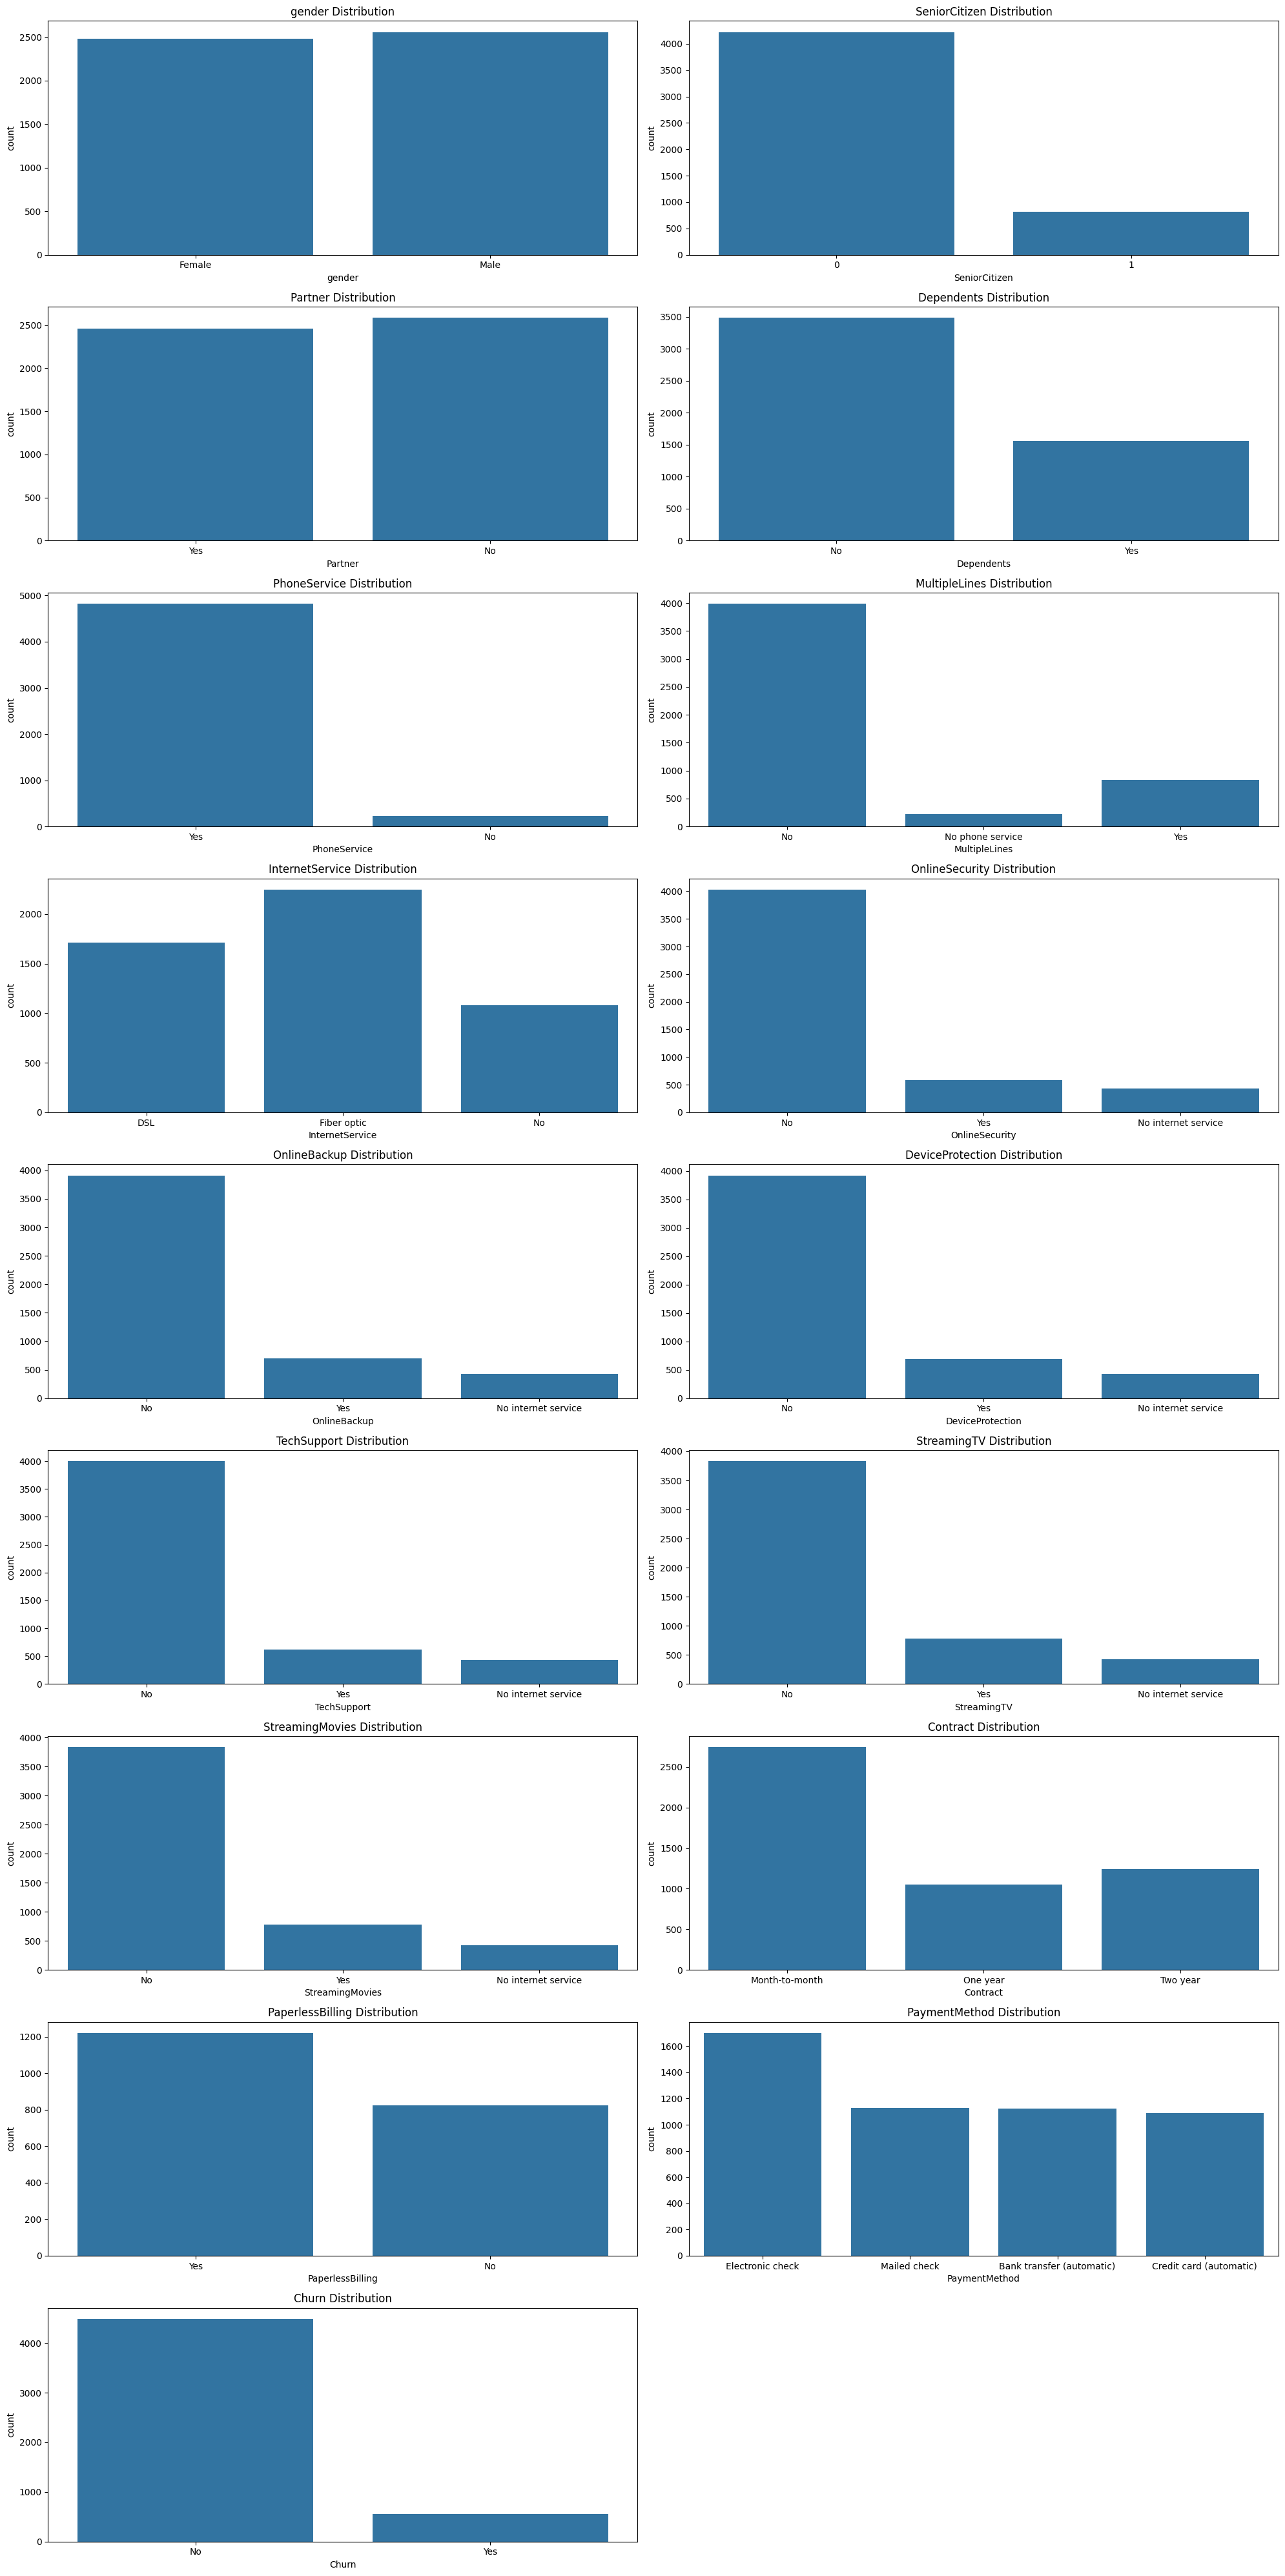

In [10]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

plt.figure(figsize=(20, 40))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns) // 2 + 1, 2, i)
    ax = sns.countplot(data=mergedTrain_data, x=column)
    plt.title(f'{column} Distribution')
   

plt.tight_layout()
plt.show()

- **Do customers with shorter contract durations (e.g., month-to-month) have higher churn rates compared to those with longer-term contracts?**

- **Is there a significant difference in churn rates between customers who use fiber optic versus DSL internet services?**

- **Does the presence of additional services (e.g., online security, tech support) reduce churn rates among customers?**

- **Are customers who pay via electronic check more likely to churn compared to those using other payment methods?**

- **How does churn vary across different demographic segments (e.g., age groups, household size)?**

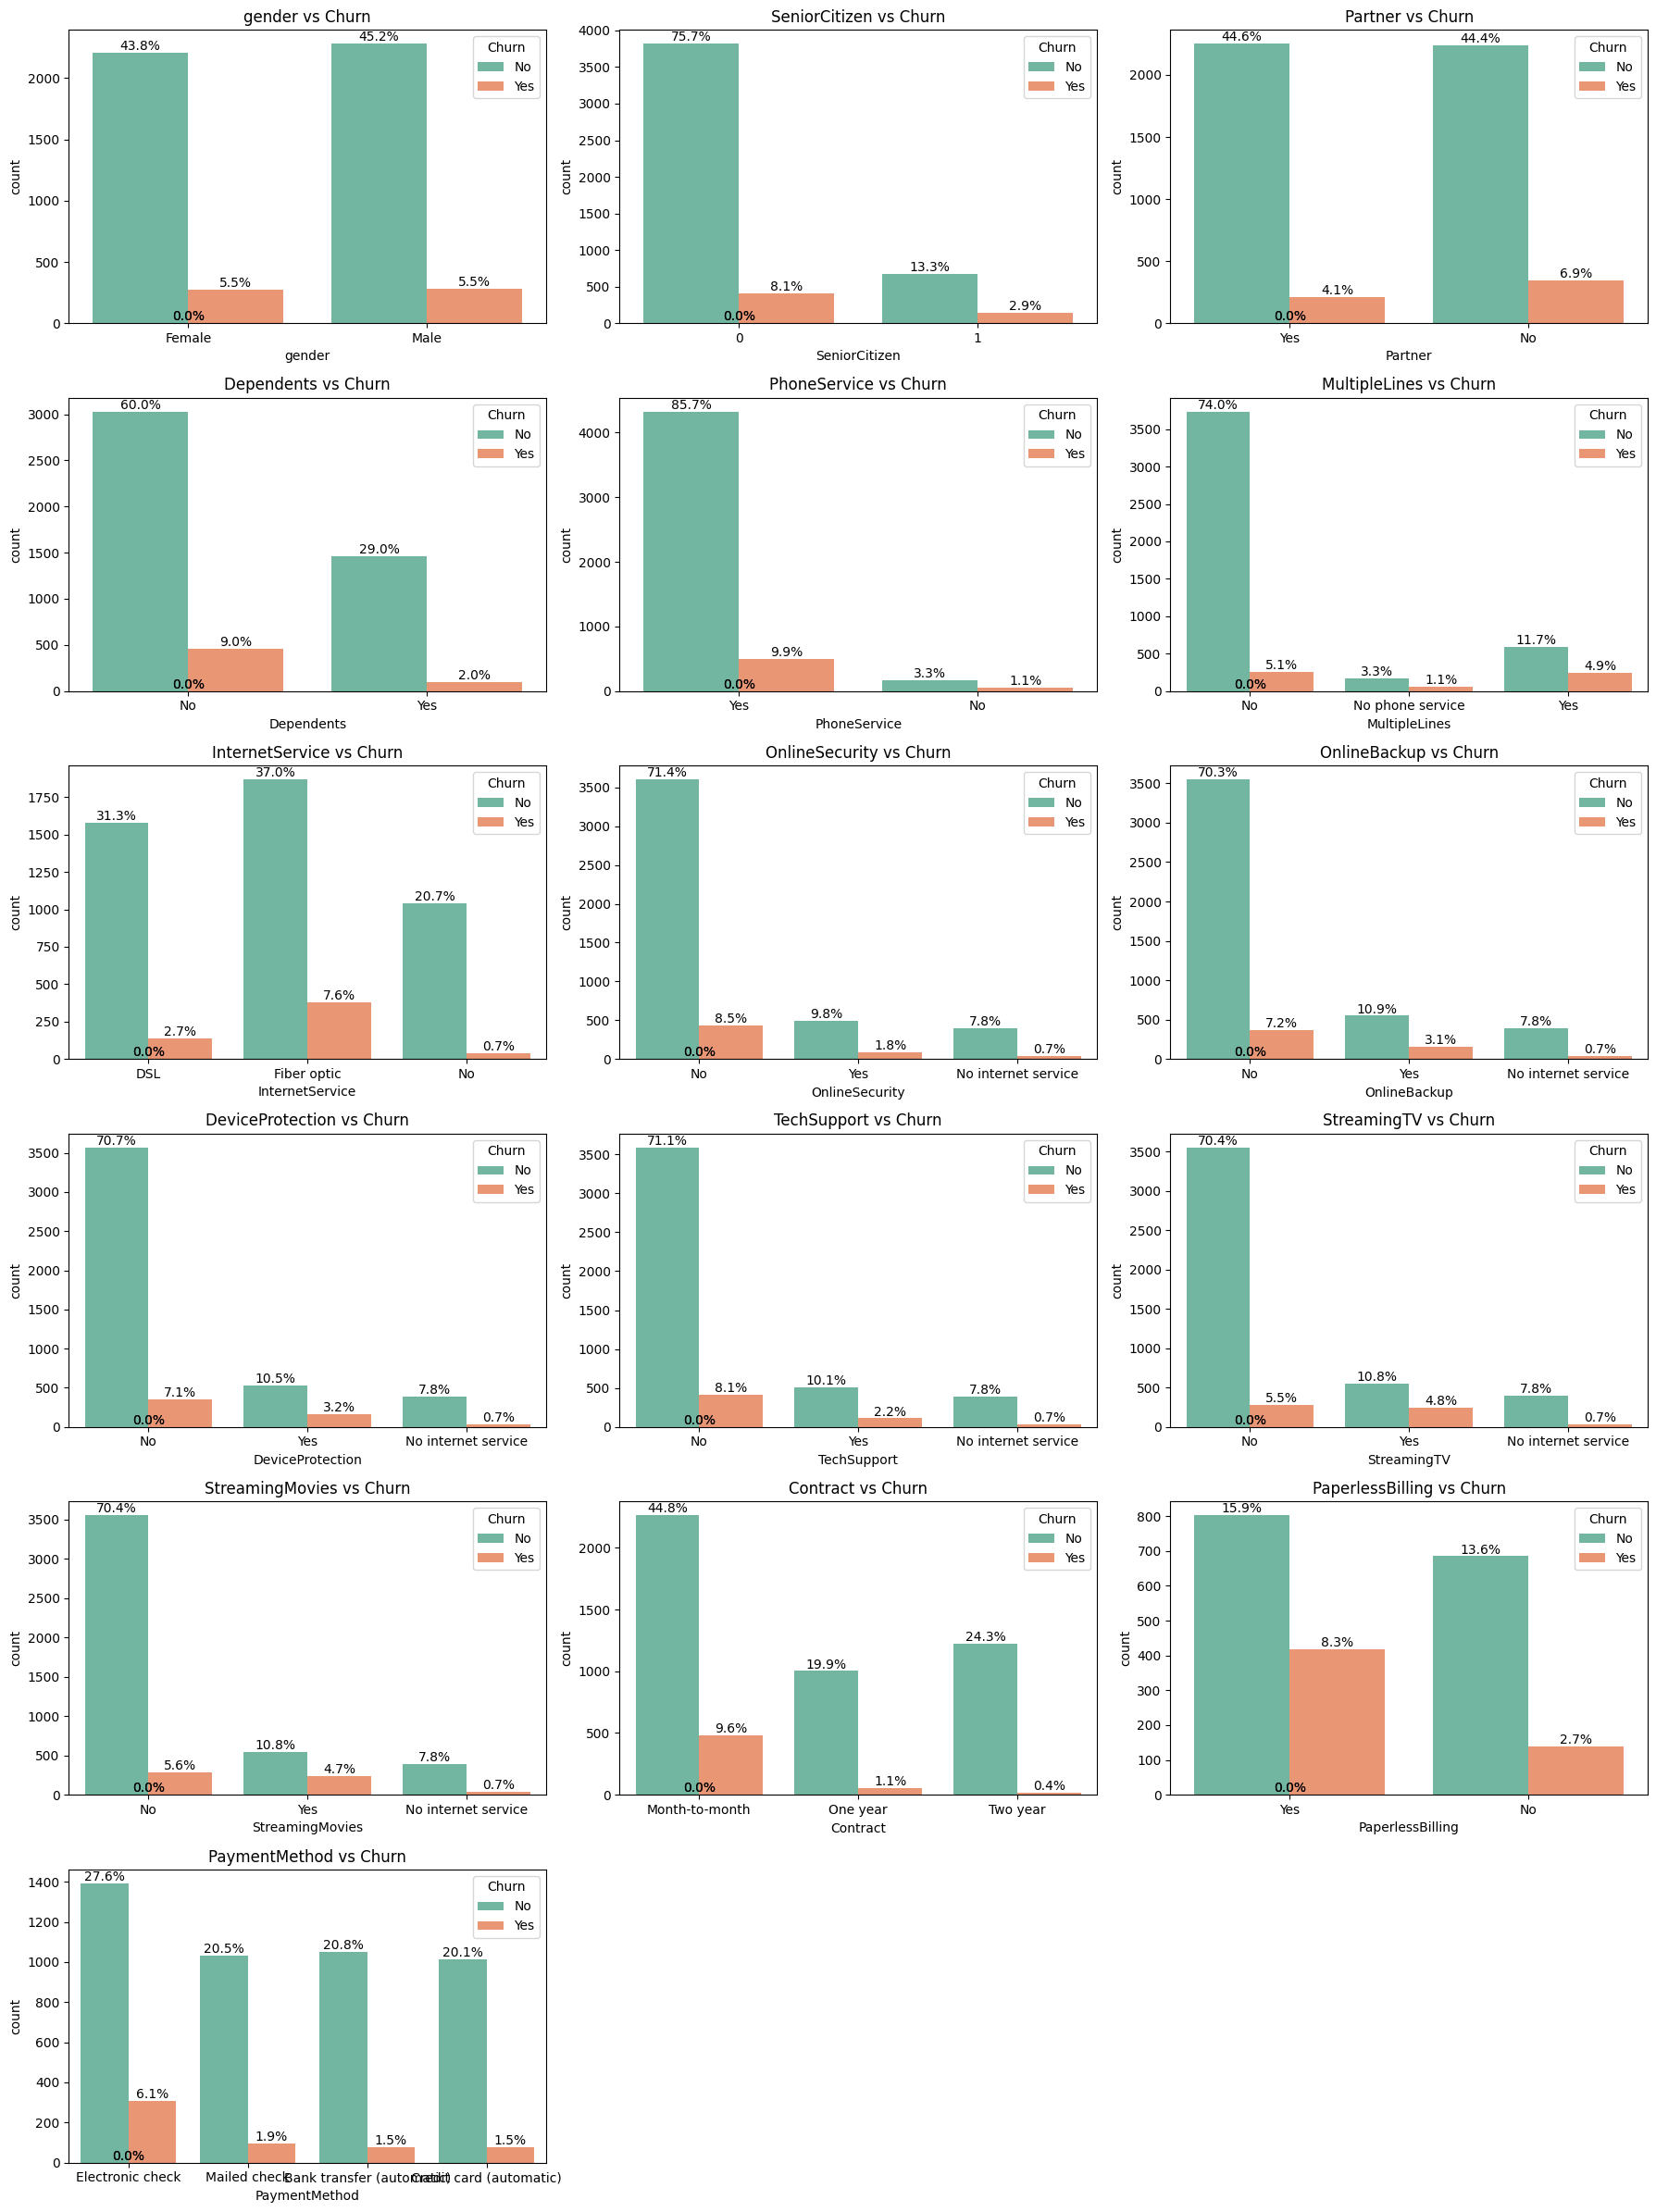

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to add percentage labels to bar plots
def add_percentage(ax, total_count):
    for p in ax.patches:
        height = p.get_height()
        percentage = f'{height / total_count * 100:.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Set up the figure and axes
plt.figure(figsize=(18, 24))

# List of categorical columns to plot
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod']

# Create subplots for each categorical column
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(6, 3, i)
    ax = sns.countplot(data=mergedTrain_data, x=column, hue='Churn', palette='Set2')
    plt.title(f'{column} vs Churn')
    add_percentage(ax, len(mergedTrain_data))

plt.tight_layout()
plt.show()


In [12]:
# Calculate churn rates by contract type
contract_counts = mergedTrain_data.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100

print(contract_counts)


Churn                  No        Yes
Contract                            
Month-to-month  82.397959  17.602041
One year        94.976303   5.023697
Two year        98.392283   1.607717


Month-to-month Contracts: Customers with month-to-month contracts have the highest churn rate (17.60%). This indicates that these customers are more likely to leave compared to those with longer contract durations.
One-year Contracts: The churn rate for one-year contracts is significantly lower at 5.02%. This suggests that customers with a one-year commitment are less likely to churn.
Two-year Contracts: The churn rate is the lowest for two-year contracts at 1.61%. This implies that customers who commit to a two-year contract are the least likely to churn.

Churn                   No        Yes
InternetService                      
DSL              91.953353   8.046647
Fiber optic      83.051601  16.948399
No               96.574074   3.425926


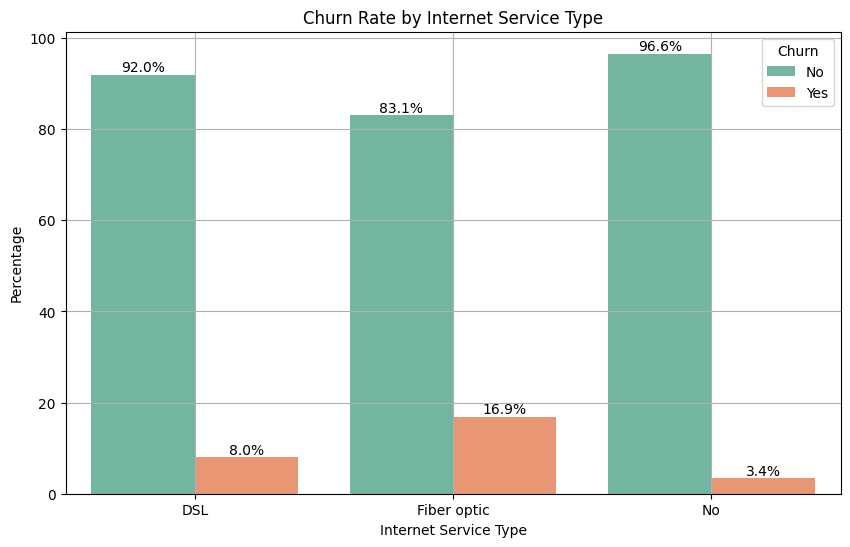

In [13]:
# Calculate churn rates by Internet Service type
internet_service_churn = mergedTrain_data.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack() * 100

print(internet_service_churn)

# Reshape the data for easier plotting with seaborn
internet_service_churn = internet_service_churn.reset_index()

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create the side-by-side bar plot
ax = sns.barplot(data=internet_service_churn.melt(id_vars='InternetService', value_vars=['No', 'Yes']),
                 x='InternetService', y='value', hue='Churn', palette='Set2')

# Add percentage labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Add titles and labels
plt.title('Churn Rate by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right')
plt.grid(True)

# Show the plot
plt.show()

DSL vs. Fiber Optic: Customers using Fiber Optic internet have a higher churn rate (16.95%) compared to those using DSL (8.05%). This suggests that customers with Fiber Optic service are almost twice as likely to churn compared to DSL customers.

No Internet Service: Customers without internet service have the lowest churn rate (3.43%), indicating that these customers are more likely to stay with the company, possibly due to using other services provided by the telecom company (e.g., only phone service).

- **Is there a relationship between tenure (length of service) and monthly charges, and how does churn status vary across different combinations?**

- **Do customers with higher monthly charges tend to churn more frequently, regardless of their tenure?**

- **How does the relationship between tenure and charges differ for customers on different contract types (e.g., month-to-month vs. annual contracts)?**

- **Are there any noticeable clusters or outliers in the scatter plot that suggest particular customer segments with distinct churn behaviors?**

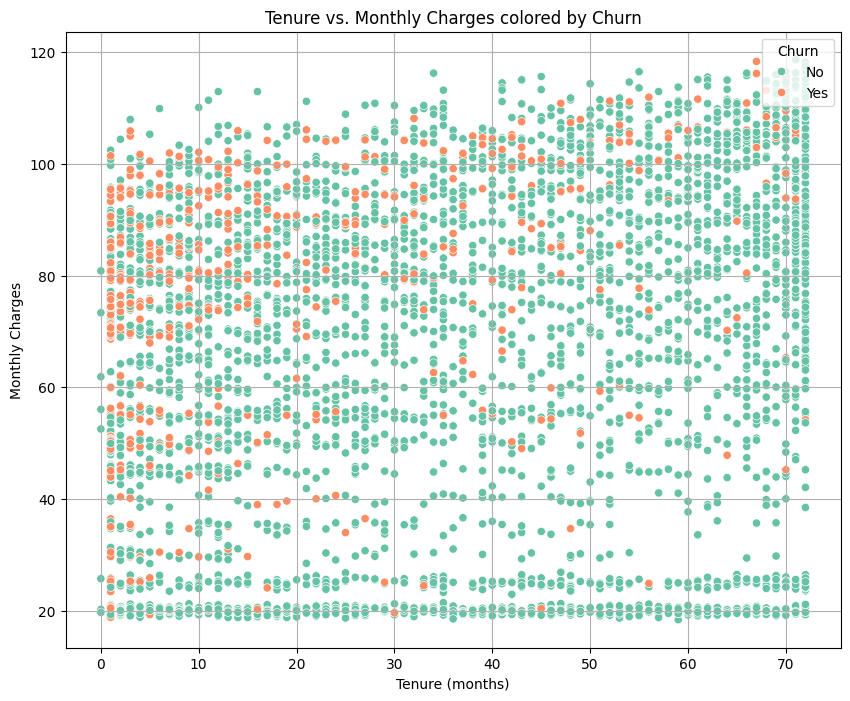

In [14]:
# Example scatter plot with seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=mergedTrain_data, x='tenure', y='MonthlyCharges', hue='Churn', palette='Set2')
plt.title('Tenure vs. Monthly Charges colored by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges')
plt.legend(title='Churn', loc='upper right')
plt.grid(True)
plt.show()

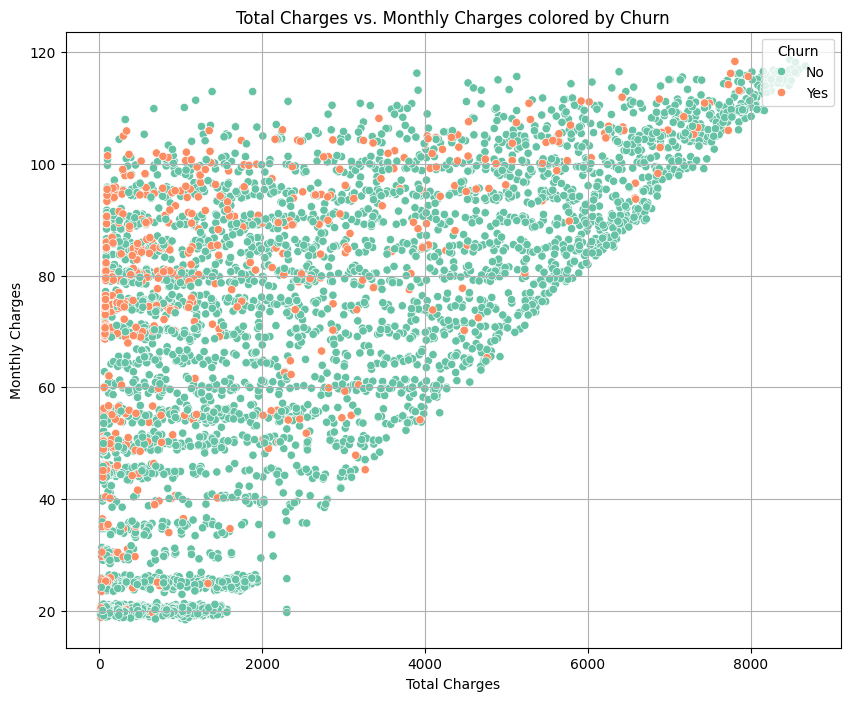

In [15]:
# Example scatter plot with seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=mergedTrain_data, x='TotalCharges', y='MonthlyCharges', hue='Churn', palette='Set2')
plt.title('Total Charges vs. Monthly Charges colored by Churn')
plt.xlabel('Total Charges')
plt.ylabel('Monthly Charges')
plt.legend(title='Churn', loc='upper right')
plt.grid(True)
plt.show()

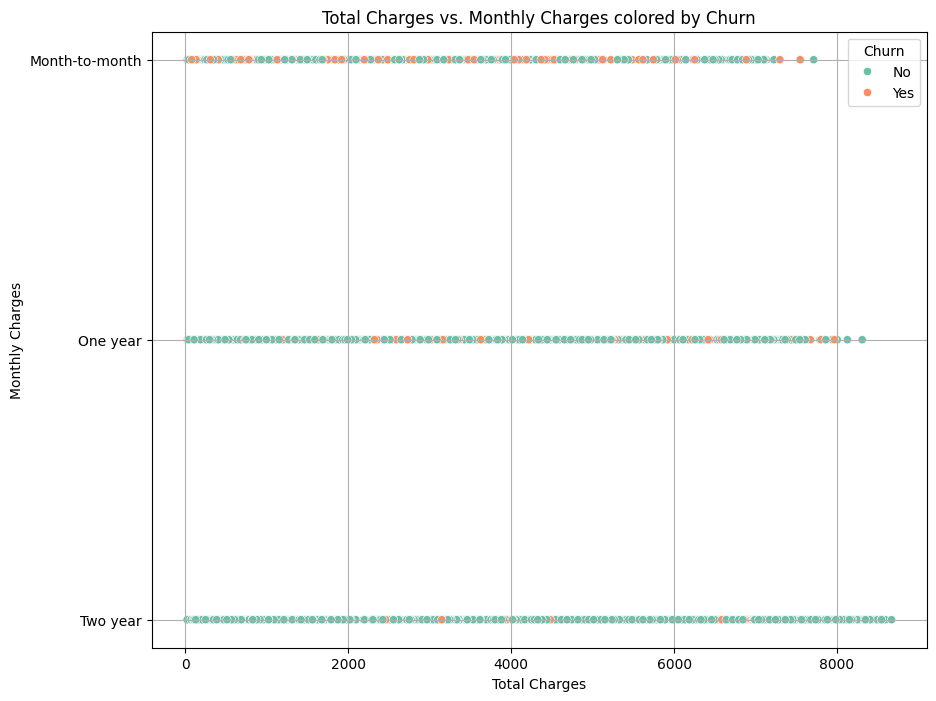

In [16]:
# Example scatter plot with seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=mergedTrain_data, x='TotalCharges', y='Contract', hue='Churn', palette='Set2')
plt.title('Total Charges vs. Monthly Charges colored by Churn')
plt.xlabel('Total Charges')
plt.ylabel('Monthly Charges')
plt.legend(title='Churn', loc='upper right')
plt.grid(True)
plt.show()

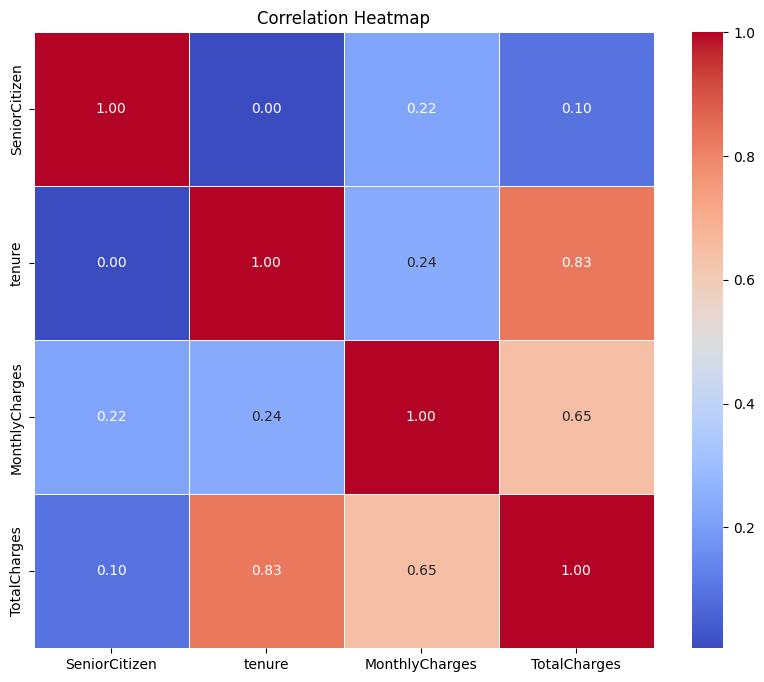

In [17]:
numeric_columns = mergedTrain_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numeric columns only
correlation_matrix = mergedTrain_data[numeric_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and display the plot
plt.title('Correlation Heatmap')
plt.show()

In [22]:
# Encode categorical variables
categorical_cols = mergedTrain_data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    mergedTrain_data[col] = le.fit_transform(mergedTrain_data[col])
    label_encoders[col] = le

# Scale numerical features excluding 'Churn'
scaler = StandardScaler()
numerical_cols = mergedTrain_data.select_dtypes(include=[np.number]).columns.drop('Churn')
mergedTrain_data[numerical_cols] = scaler.fit_transform(mergedTrain_data[numerical_cols])

# Ensure 'Churn' is binary (0 and 1)
mergedTrain_data['Churn'] = (mergedTrain_data['Churn'] > 0.5).astype(int)

# Define features (X) and target (y)
X = mergedTrain_data.drop('Churn', axis=1)
y = mergedTrain_data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# # Encode categorical variables
# categorical_cols = mergedTrain_data.select_dtypes(include=['object']).columns
# label_encoders = {}

# for col in categorical_cols:
#     le = LabelEncoder()
#     mergedTrain_data[col] = le.fit_transform(mergedTrain_data[col])
#     label_encoders[col] = le

# # Scale numerical features
# scaler = StandardScaler()
# numerical_cols = mergedTrain_data.select_dtypes(include=[np.number]).columns
# mergedTrain_data[numerical_cols] = scaler.fit_transform(mergedTrain_data[numerical_cols])

# # Define features (X) and target (y)
# X = mergedTrain_data.drop('Churn', axis=1)
# y = mergedTrain_data['Churn']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print("Data preprocessing completed.")


Data preprocessing completed.


In [23]:
print(mergedTrain_data['Churn'].unique())


[0 1]


In [24]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train models and evaluate them
model_performance = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    model_performance.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })

# Convert the results to a DataFrame
performance_df = pd.DataFrame(model_performance)

# Print the DataFrame
performance_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.885035,0.527273,0.243697,0.333333,0.607242
1,Decision Tree,0.872151,0.462121,0.512605,0.486056,0.716415
2,Random Forest,0.916749,0.746479,0.445378,0.557895,0.712577


## **Model Evaluation and Selection**

**Models Evaluated**

Three machine learning models were evaluated to predict customer churn:

- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier

The evaluation metrics considered were Accuracy, Precision, Recall, F1 Score, and ROC AUC. Among these, Precision was prioritized as the key metric for model selection.

Model Performance Metrics

| Model                | Accuracy | Precision | Recall | F1 Score | ROC AUC |
|----------------------|----------|-----------|--------|----------|---------|
| Logistic Regression  | 0.885    | 0.527     | 0.244  | 0.333    | 0.607   |
| Decision Tree        | 0.872    | 0.462     | 0.513  | 0.486    | 0.716   |
| Random Forest        | 0.917    | 0.746     | 0.445  | 0.558    | 0.713   |

**The Random Forest** model achieved the highest precision (0.746), indicating that it was the most accurate in predicting true positives among all positive predictions. Additionally, it had the highest accuracy (0.917) and a good balance of other metrics.